Dataset Shape: (119390, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119

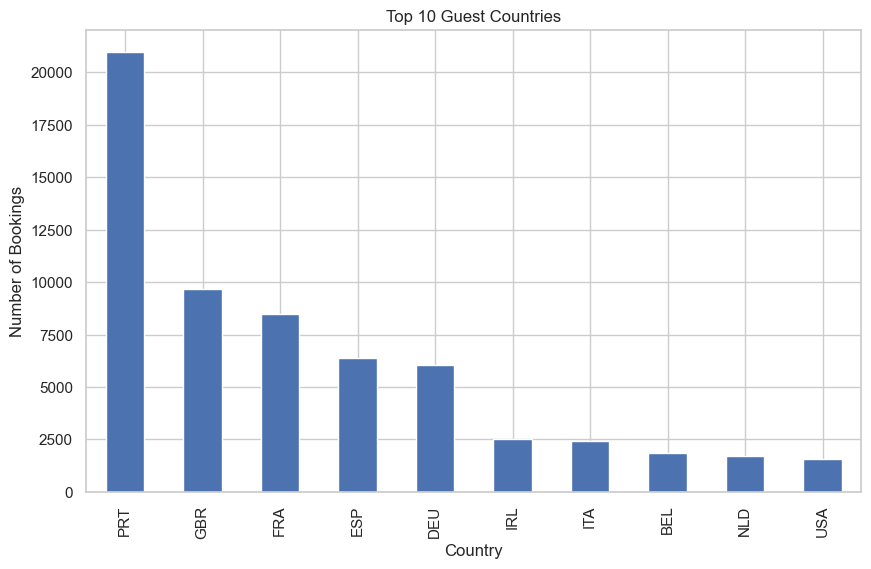


Average ADR by Hotel Type:
hotel
City Hotel      106.036141
Resort Hotel     90.822527
Name: adr, dtype: float64


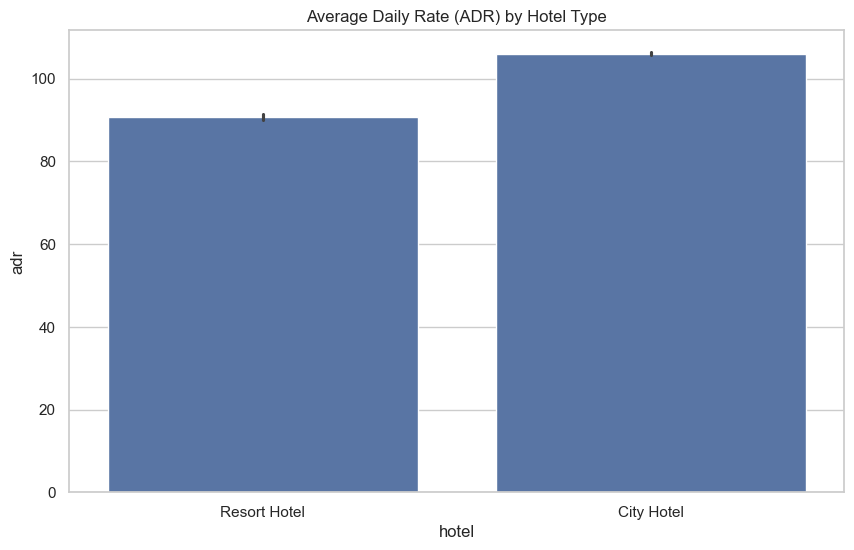

C:\Users\Abhinav K.R\AppData\Local\Temp\ipykernel_1756\2316594877.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_cancelled['arrival_date_month'] = pd.Categorical(
C:\Users\Abhinav K.R\AppData\Local\Temp\ipykernel_1756\2316594877.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_adr = df_not_cancelled.groupby(


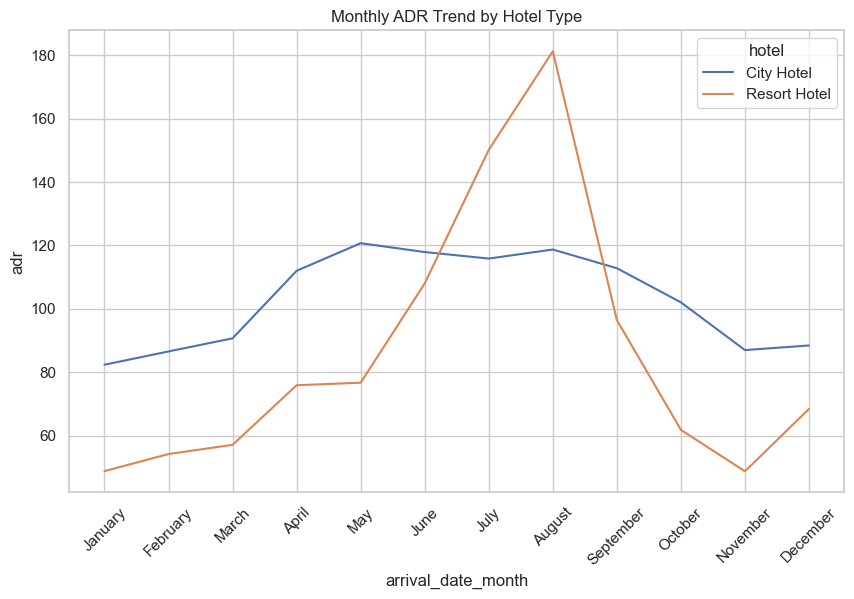

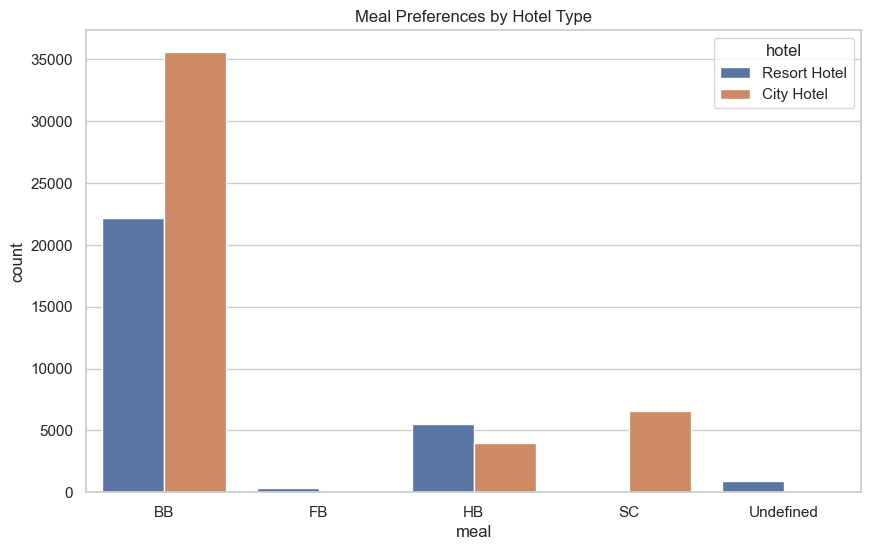

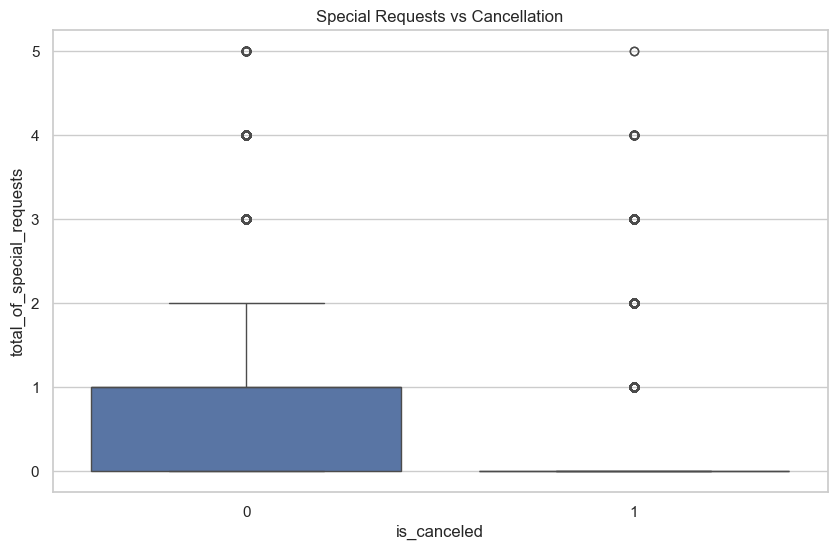

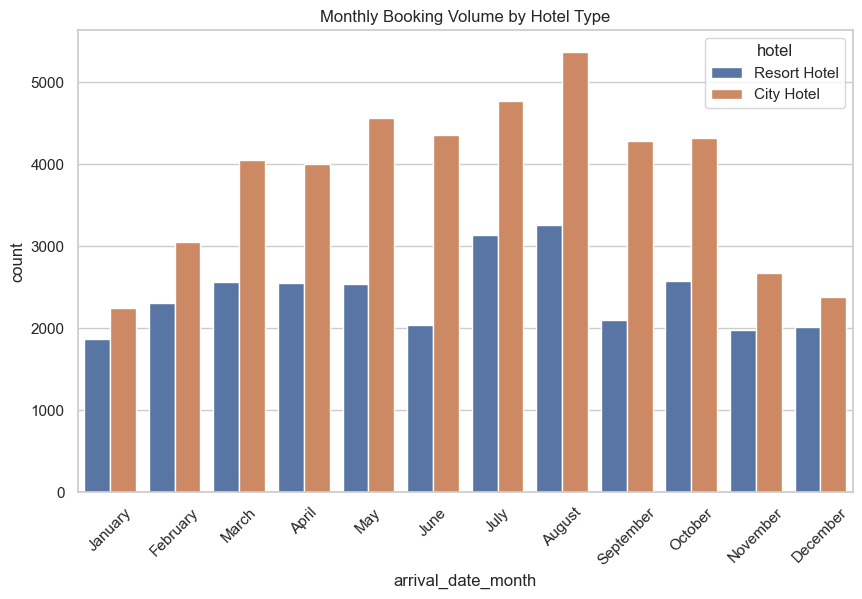

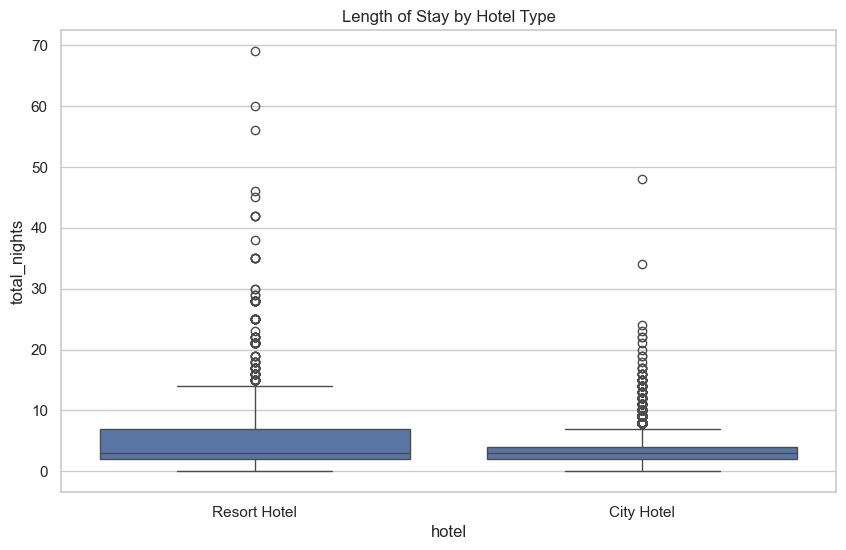

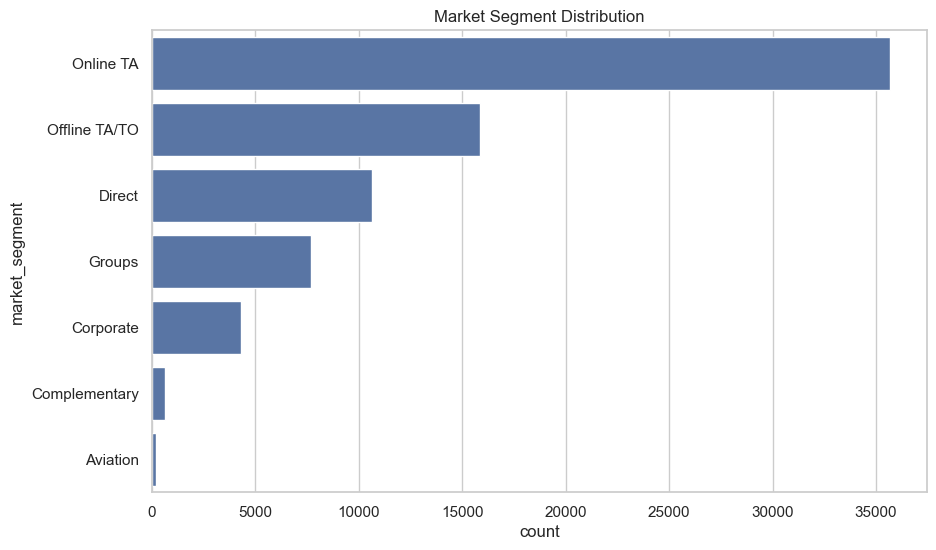

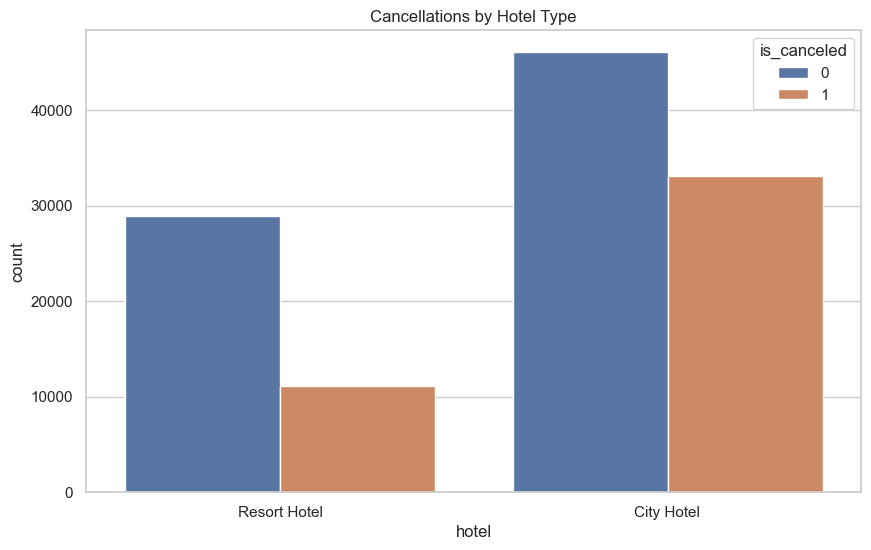


FINAL INSIGHTS:
1. City Hotels receive higher booking volume but experience more cancellations.
2. Resort Hotels have higher Average Daily Rate (ADR).
3. July and August are peak booking months.
4. Guests with more special requests are less likely to cancel.
5. Online Travel Agents dominate the market segments.
6. Resort Hotels show longer average length of stay.



In [6]:


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


df = pd.read_csv(r"C:\Users\Abhinav K.R\OneDrive\Desktop\hotel_bookings.csv")



print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())


print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))


df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)


df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']


df = df[df['total_guests'] > 0]

7
df_not_cancelled = df[df['is_canceled'] == 0]


top_countries = df_not_cancelled['country'].value_counts().head(10)
print("\nTop 10 Guest Countries:")
print(top_countries)

top_countries.plot(kind='bar')
plt.title("Top 10 Guest Countries")
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.show()


print("\nAverage ADR by Hotel Type:")
print(df_not_cancelled.groupby('hotel')['adr'].mean())

sns.barplot(x='hotel', y='adr', data=df_not_cancelled)
plt.title("Average Daily Rate (ADR) by Hotel Type")
plt.show()


month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df_not_cancelled['arrival_date_month'] = pd.Categorical(
    df_not_cancelled['arrival_date_month'],
    categories=month_order,
    ordered=True
)

monthly_adr = df_not_cancelled.groupby(
    ['arrival_date_month', 'hotel']
)['adr'].mean().reset_index()

sns.lineplot(
    x='arrival_date_month',
    y='adr',
    hue='hotel',
    data=monthly_adr
)
plt.xticks(rotation=45)
plt.title("Monthly ADR Trend by Hotel Type")
plt.show()


sns.countplot(x='meal', hue='hotel', data=df_not_cancelled)
plt.title("Meal Preferences by Hotel Type")
plt.show()


sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df)
plt.title("Special Requests vs Cancellation")
plt.show()


sns.countplot(x='arrival_date_month', hue='hotel', data=df_not_cancelled)
plt.xticks(rotation=45)
plt.title("Monthly Booking Volume by Hotel Type")
plt.show()
 
sns.boxplot(x='hotel', y='total_nights', data=df_not_cancelled)
plt.title("Length of Stay by Hotel Type")
plt.show()


sns.countplot(
    y='market_segment',
    data=df_not_cancelled,
    order=df_not_cancelled['market_segment'].value_counts().index
)
plt.title("Market Segment Distribution")
plt.show()


sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Cancellations by Hotel Type")
plt.show()


print("""
FINAL INSIGHTS:
1. City Hotels receive higher booking volume but experience more cancellations.
2. Resort Hotels have higher Average Daily Rate (ADR).
3. July and August are peak booking months.
4. Guests with more special requests are less likely to cancel.
5. Online Travel Agents dominate the market segments.
6. Resort Hotels show longer average length of stay.
""")
